In [118]:
import pandas as pd
import numpy as np
import os
from utils import *



import file_config as fc
fig_save_path = os.path.join(fc.ROOT_DIR,'csi500')

In [ ]:
df = pd.read_parquet('prediction_xgb_outsample.parquet')
df = df.pivot_table(index='Date',columns='Symbol',values='pred')
df = df[df.index > '2019-01-01']


Symbol,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,-0.000005,-0.001807,0.000234,0.000045,-0.000962,-0.002481,-0.000684,0.000439,0.000102,-0.002443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.001666,-0.001812,-0.000355,-0.000583,-0.001753,-0.000586,-0.000341,-0.000177,0.000885,-0.003846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,-0.001397,-0.001891,-0.000111,-0.001252,-0.001226,-0.001433,-0.000346,-0.001127,0.000002,-0.003050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,0.000038,-0.002084,0.002040,-0.001484,-0.001179,-0.001222,0.000346,0.000778,0.000163,-0.003910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,-0.001972,-0.002308,0.000817,-0.000188,-0.000985,0.003238,-0.000593,-0.000859,0.000009,-0.003529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-26,-0.000498,-0.001840,0.001681,-0.000066,-0.000250,-0.001541,-0.000140,-0.000661,-0.001399,-0.000247,...,0.001233,0.000854,0.001060,0.000422,0.001082,0.000876,0.001446,0.000685,-0.000065,-0.000390
2024-09-27,-0.000919,-0.001578,-0.003392,0.000709,-0.000264,-0.000169,0.000311,-0.000745,-0.001261,0.000056,...,0.000752,0.000920,0.001352,-0.000654,0.001464,0.001213,0.001053,0.006613,0.000341,0.000336
2024-09-30,-0.000992,-0.001715,-0.000154,0.000296,-0.000772,0.000214,0.000082,-0.000479,0.000029,0.000041,...,0.000847,0.000915,0.001478,0.000439,0.001381,0.001560,0.000831,0.001145,0.000673,0.000999


In [109]:
index = pd.read_parquet(os.path.join(fc.BARR_DIR,'idx__csi500_weight.parquet'))
index = index.pivot_table(index='Date',columns='Symbol',values='Weight')
index.index = pd.to_datetime(index.index, format='%Y%m%d')
index = index[index.index > '2019-01-01']
index

Symbol,000005.SZ,000006.SZ,000008.SZ,000009.SZ,000012.SZ,000016.SZ,000021.SZ,000025.SZ,000027.SZ,000028.SZ,...,688567.SH,688617.SH,688690.SH,688728.SH,688772.SH,688777.SH,688778.SH,688779.SH,688819.SH,689009.SH
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,0.001631,0.002922,0.003086,0.001479,NaN,0.001409,0.000718,0.002080,0.002061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,0.001636,0.002940,0.003106,0.001488,NaN,0.001404,0.000728,0.002058,0.002019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,0.001643,0.002923,0.003077,0.001507,NaN,0.001401,0.000741,0.002068,0.002033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,NaN,0.001639,0.002907,0.003097,0.001505,NaN,0.001402,0.000731,0.002047,0.001982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,NaN,0.001634,0.002971,0.003097,0.001488,NaN,0.001436,0.000721,0.002014,0.001942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-17,NaN,NaN,NaN,0.002721,NaN,NaN,0.002227,NaN,0.001427,NaN,...,0.001305,0.003735,NaN,NaN,0.001616,0.004721,0.000842,0.000788,0.000657,0.003384
2024-10-18,NaN,NaN,NaN,0.002682,NaN,NaN,0.002268,NaN,0.001423,NaN,...,0.001306,0.003716,NaN,NaN,0.001662,0.004820,0.000829,0.000776,0.000647,0.003455
2024-10-21,NaN,NaN,NaN,0.002686,NaN,NaN,0.002297,NaN,0.001395,NaN,...,0.001355,0.003631,NaN,NaN,0.001712,0.004901,0.000845,0.000786,0.000651,0.003587


Text(0.5, 1.0, 'CSI500 Index Return')

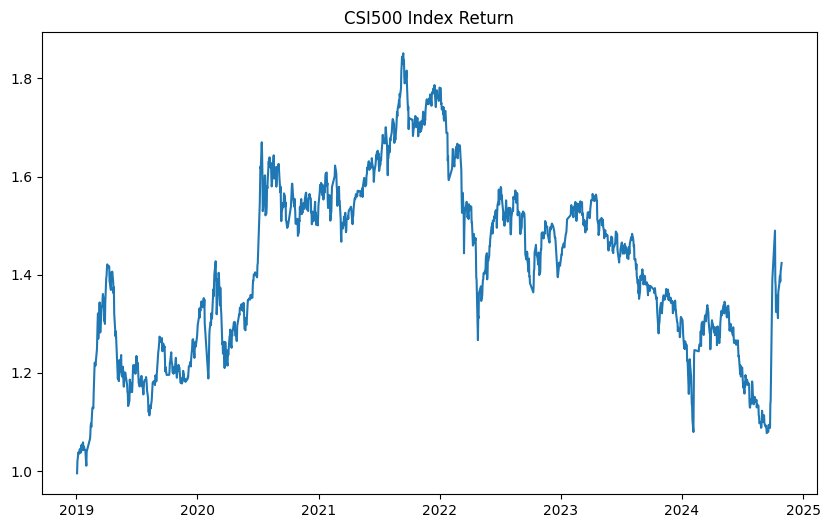

In [116]:
def get_index_price(index:str, start_date:str, end_date:str, field:str='close'):
    index_list = ['000300.SH', '000905.SH', '000852.SH', '000985.SH']
    if index not in index_list:
        print(f'pleace select from {index_list}')
    
    index = pd.read_csv(f'{index}.csv')[['ts_code', 'trade_date', field]]
    index['trade_date'] = pd.to_datetime(index['trade_date'], format='%Y%m%d')
    index = index.loc[(index.trade_date >= start_date) & (index.trade_date <= end_date), ['ts_code','trade_date', 'close']]
    return index.pivot(index='trade_date', columns='ts_code', values=field)

index_price = get_index_price('000905.SH', '2019-01-01', '2025-01-01')
index_return = index_price.pct_change().dropna()
index_return['cul_return'] = (index_return + 1).cumprod()
fig = plt.figure(figsize=(10,6))
plt.plot(index_return['cul_return'], label='000905.SH')
plt.title('CSI500 Index Return')

Text(0.5, 1.0, 'CSI500 No. of Stocks')

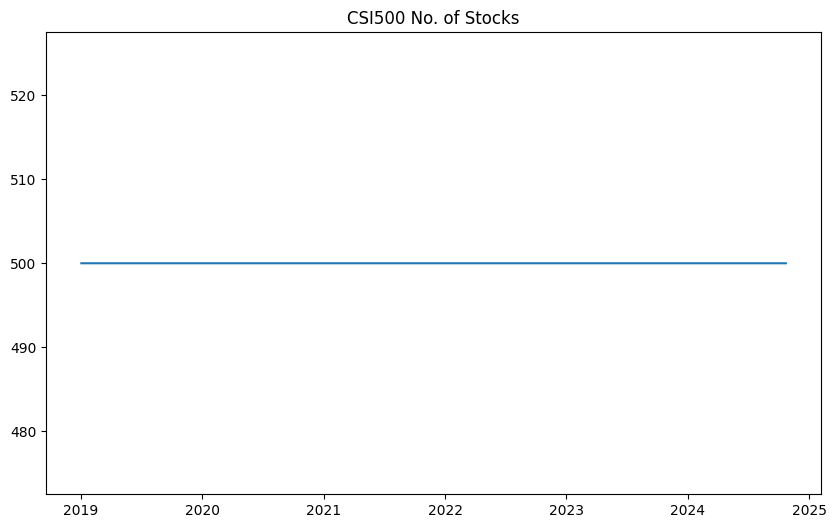

In [115]:
fig = plt.figure(figsize=(10,6))
plt.plot(index.count(axis=1),label='index')
plt.title('CSI500 No. of Stocks')



In [126]:
def get_buy_list(df,top_type = 'rank',rank_n = 100,quantile_q = 0.8):
    """
    :param df: 因子值 -> dataframe/unstack
    :param top_tpye: 选择买入队列方式，从['rank','quantile']选择一种方式 -> str
    :param rank_n: 值最大的前n只的股票 -> int
    :param quantile_q: 值最大的前n分位数的股票 -> float
    :return df: 买入队列 -> dataframe/unstack
    """
    if top_type == 'rank':
        df = df.rank(axis  = 1,ascending=False) <= rank_n
    elif top_type == 'quantile':
        df = df.sub(df.quantile(quantile_q,axis = 1),axis = 0) > 0
    else:
        print("select one from ['rank','quantile']")

    df = df.astype(int)
    df = df.replace(0,np.nan).dropna(how = 'all',axis = 1)
    
    return df


In [121]:
df_xgb = pd.read_parquet('prediction_xgb_outsample.parquet')
df_xgb = df_xgb.pivot_table(index='Date',columns='Symbol',values='pred')

In [131]:
df_xgb[df_xgb.index == '2012-04-10'].T.sort_values('2012-04-10',ascending=False).head(10)

Date,2012-04-10
Symbol,
000971.SZ,0.009273
300309.SZ,0.003485
600016.SH,0.003415
601258.SH,0.003415
000498.SZ,0.003415
002096.SZ,0.003415
002093.SZ,0.003415
002051.SZ,0.003415
600675.SH,0.003415


<Axes: xlabel='Date'>

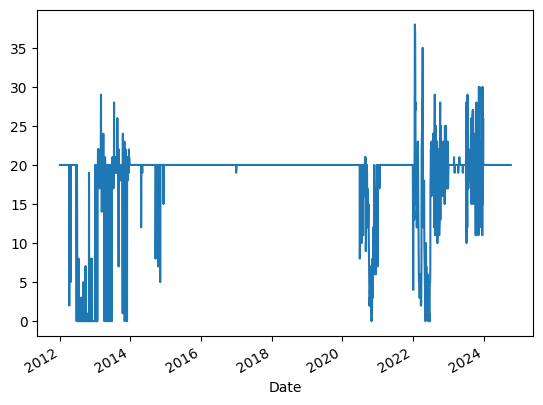

In [ ]:
buy_list = get_buy_list(df_xgb,rank_n=20) <= 20
buy_list.astype(int).sum(axis=1).plot()

In [ ]:


buy_list

# calculate turnover

def get_turnover(buy_list, change_n):
    turnover_dict = {}

    for i, day in enumerate(buy_list.index,1):
        if day == buy_list.index[0]:
            temp_list = buy_list.loc[day]
        else:
            if i % change_n == 0:
                turnover = len(set(buy_list.loc[day].dropna().index).difference(set(temp_list.dropna().index)))/len(temp_list.dropna().index)
                turnover_dict[day] = turnover
                temp_list = buy_list.loc[day]
            
    return turnover_dict

turnover_dict = get_turnover(buy_list,20)



In [102]:
turnover_dict

{Timestamp('2012-02-07 00:00:00'): 1.0,
 Timestamp('2012-03-06 00:00:00'): 1.0,
 Timestamp('2012-04-06 00:00:00'): 1.0,
 Timestamp('2012-05-08 00:00:00'): 1.0,
 Timestamp('2012-06-05 00:00:00'): 0.95,
 Timestamp('2012-07-04 00:00:00'): 1.0,
 Timestamp('2012-08-01 00:00:00'): 0.3,
 Timestamp('2012-08-29 00:00:00'): 0.25,
 Timestamp('2012-09-26 00:00:00'): 0.9,
 Timestamp('2012-10-31 00:00:00'): 0.95,
 Timestamp('2012-11-28 00:00:00'): 0.95,
 Timestamp('2012-12-26 00:00:00'): 0.85,
 Timestamp('2013-01-28 00:00:00'): 1.0,
 Timestamp('2013-03-04 00:00:00'): 1.0,
 Timestamp('2013-04-01 00:00:00'): 1.0,
 Timestamp('2013-05-06 00:00:00'): 0.95,
 Timestamp('2013-06-03 00:00:00'): 1.0,
 Timestamp('2013-07-04 00:00:00'): 1.0,
 Timestamp('2013-08-01 00:00:00'): 1.0,
 Timestamp('2013-08-29 00:00:00'): 0.9,
 Timestamp('2013-09-30 00:00:00'): 1.0,
 Timestamp('2013-11-04 00:00:00'): 1.0,
 Timestamp('2013-12-02 00:00:00'): 1.0,
 Timestamp('2013-12-30 00:00:00'): 1.0,
 Timestamp('2014-01-28 00:00:00'):

In [103]:
turnover_df = pd.DataFrame.from_dict(turnover_dict,orient='index',columns=['turnover'])

In [108]:
turnover_df

,turnover
2012-02-07,1.00
2012-03-06,1.00
2012-04-06,1.00
2012-05-08,1.00
2012-06-05,0.95
...,...
2024-05-14,1.00
2024-06-12,0.95
2024-07-10,1.00
2024-08-07,0.95


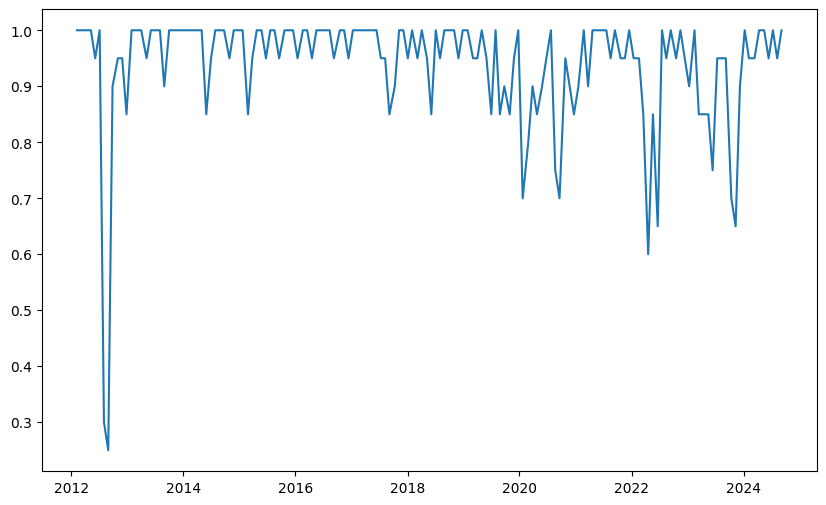

In [107]:
fig = plt.figure(figsize=(10,6))

plt.plot(turnover_df.index,turnover_df['turnover'])
plt.title('Turnover')
plt.s
